#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

# Θεωριτικό μέρος.

## Άρθρο 1 - US AI Letters in post office.
1. Όλα τα συνολα του πραγματικού κόσμου , train & test  , έχουν λάθη.
2. Προεργασία: Κάνει την κάθε εικόνα-αριθμό απο 40 εως 60 pixel που ήταν σε 16*16 pixel. Επιπλέον κάθε εικόνα λόγω αυτης της αλλαγής γίνεται γκρί με κλίματα απο -1(ασπρο) έως 1 (μαύρο).
3. Network: Μετά την αλλαγή του μεγέθους και της κανονικοποίησης -> κατατάσετε σε 10 κλάσεις . 
Διαδικασία της πρόβλεψης/αναγνώρησης της εικόνας:

<img src="./network_in_a_nutshell.png" alt="drawing" width="800"/>

    1. weighted vector (like convolution)
    2. 5 level of layers.
    3. H1 & H3: shared weights
    4. H2 & H4 : averaging/subsampling layers.
    5. Η εικόνα ειναι 28επι28 για να υπάρχει επαρκώς χόρος αναγώρησης.
    6. 
    7. 


    

## Ερώτηση 1:
#### Περιγράψτε τη λειτουργία της Rectified Linear Unit (ReLU) :
Η ReLU χρησιμοποιείται σαν ένας εναλλακτικός τρόπος μοντελοποίησης της εξόδου ενός νευρώνα, παρά της κλασσικής συνάρτησης 
$$f(x) = tanh(x) ή f(x) = {(1+e^{-x})}^{-1}$$ 
Ο λόγος είναι ότι οι συναρτήσεις αυτές αντί της ReLU απαιτούν περισσότερο χρόνο εκπαίδευσης αφού οι μη κορεσμένες αυτές γραμμικότητες είναι πολύ πιο αργές από την κορεσμένη μη γραμμικότητα της συνάρτησης που χρησιμοποιεί η ReLU (f(x) = max(0,x)). Έτσι, με τη χρήση της ReLU, η εκπαίδευση των βαθιών συνελικτικών νευρωνικών δικτύων γίνεται αρκετές φορές γρηγορότερα από ότι αν χρησιμοποιείτο κάποια ισοδύναμη tanh συνάρτηση. Όπως αναφέρεται και στο άρθρο (https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) στην παράγραφο 3.1, χωρίς τη χρήση της ReLU δε θα ήμασταν σε θέση να πειραματιστούμε με τόσο μεγάλα νευρωνικά δίκτυα εαν έπρεπε να χρησιμοποιήσουμε παραδοσιακά κορεσμένα νευρωνικά μοντέλα. Εν κατακλείδι, χρησιμοποιούμε ReLU διότι μπορούμε να εκπαιδεύσουμε γρηγορότερα κάποιο νευρωνικό δίκτυο, κάτι που έχει μεγάλο αντίκτυπο στην απόδοση μεγάλων μοντέλων που θα εκπαιδευτούν σε μεγάλα datasets.


#### Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα και σχολιάστε επαρκώς τις διαφορές τους. Ποια χαρακτηριστικά αυτών των τριών δικτύων είναι κατά τη γνώμη σας αυτά που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης.

| Network's Name | Small Description| Levels| Initial Image Size| Filter's |  Function | Network's Parameters | Pooling | Dropout |
|----------------|------------------|-------|-------------------|----------|-----------|----------------------|---------|---------|
|LeNet           |                  |   5   |    28x28          |         |    Sigmoid|   2578 (indipendent) | Yes     |   No    |
|AlexNet         |                  |   8   |   224x224x3       |  11x11x3, 5x5x3, 3x3x3        |    Relu   |         60 millions  |  Yes    |   Yes   | 
|VGG             |                  |   16  |   224x224x1       |          |    Relu   |        144 millions  |  Yes    |   Yes   |

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [8]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [9]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [10]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 88

In [11]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [12]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [13]:
# print our classes
print(our_classes)

[' baby', ' bowl', ' bridge', ' crab', ' cup', ' dinosaur', ' fox', ' hamster', ' maple_tree', ' poppy', ' rabbit', ' road', ' streetcar', ' tank', ' television', ' tractor', ' train', ' turtle', ' whale', ' worm']


In [14]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


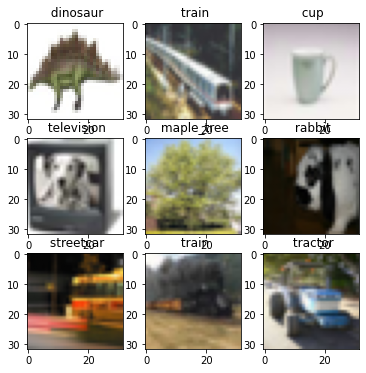

In [15]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



LeNet

In [28]:
# First LeNet Architecture
def LeNet_with_parameters (input_shape_for_image=(32,32,3), num_classes=100):
    model =models.Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=input_shape_for_image))
    model.add(layers.AvgPool2D(pool_size=2, strides=2))
    model.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
    model.add(layers.AvgPool2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='sigmoid'))
    model.add(layers.Dense(units=84, activation='sigmoid'))
    model.add(layers.Dense(units=num_classes, activation='softmax'))
    return model

X = tf.random.uniform((1, 32, 32, 3))
for layer in LeNet_with_parameters().layers:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)
LeNet_model_with_parameters = LeNet_with_parameters()
LeNet_model_with_parameters_2 = LeNet_with_parameters()
LeNet_model_with_parameters.summary()
    

Conv2D output shape: 	 (1, 32, 32, 6)
AveragePooling2D output shape: 	 (1, 16, 16, 6)
Conv2D output shape: 	 (1, 12, 12, 16)
AveragePooling2D output shape: 	 (1, 6, 6, 16)
Flatten output shape: 	 (1, 576)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 100)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_28 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_29 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)       

AlexNet

In [29]:
def AlexNet(input_size_for_image=(32,32,3), num_classes=100):
    model = models.Sequential()
    # maybe fix me later ?
    # make the input 224, 224, 3
    model.add(layers.experimental.preprocessing.Resizing(224,224, interpolation='bilinear', input_shape=input_size_for_image, crop_to_aspect_ratio=False))
    model.add(tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu',kernel_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01), input_shape=(224, 224, 3)))
    model.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), activation='relu', kernel_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01), bias_initializer='ones'))
    model.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model.add(tf.keras.layers.Conv2D(384, (3, 3), activation='relu', kernel_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01)))
    model.add(tf.keras.layers.Conv2D(384, (3, 3), activation='relu', kernel_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01),bias_initializer='ones'))
    model.add(tf.keras.layers.Conv2D(384, (3, 3), activation='relu', kernel_initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01), bias_initializer='ones'))
    model.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, kernel_initializer = tf.random_normal_initializer(mean=0.0, stddev=0.01), bias_initializer='ones'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, kernel_initializer = tf.random_normal_initializer(mean=0.0, stddev=0.01), bias_initializer='ones'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer= tf.random_normal_initializer(mean=0.0, stddev=0.01)))
    return model
X = tf.random.uniform((1, 32, 32, 3))  
for layer in AlexNet().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)
AlexNet_model_1 = AlexNet()
AlexNet_model_2 = AlexNet()
AlexNet_model_1.summary()


Resizing output shape: 	 (1, 224, 224, 3)
Conv2D output shape: 	 (1, 54, 54, 96)
MaxPooling2D output shape: 	 (1, 26, 26, 96)
Conv2D output shape: 	 (1, 22, 22, 256)
MaxPooling2D output shape: 	 (1, 10, 10, 256)
Conv2D output shape: 	 (1, 8, 8, 384)
Conv2D output shape: 	 (1, 6, 6, 384)
Conv2D output shape: 	 (1, 4, 4, 384)
MaxPooling2D output shape: 	 (1, 1, 1, 384)
Flatten output shape: 	 (1, 384)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 10)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3

VGG

In [ ]:

def VGG(conv_arch,input=(32,32,3), num_classes=100):
    # original VGG model for pictures 224x224
	model = models.sequential()
	model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=input, crop_to_aspect_ratio=False))
	


	return model


### Εκπαίδευση των μοντέλων



In [18]:
# Best optimizers
kwargs ={}
Nadam = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs)

Adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adam", **kwargs)
RMSprop = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop", **kwargs)

In [26]:
LeNet_model_with_parameters.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
LeNet_history_with_parameters = LeNet_model_with_parameters.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


266/266 [==============================] - 7s 24ms/step - loss: 3.1441 - accuracy: 0.0468 - val_loss: 3.0216 - val_accuracy: 0.0500
Epoch 2/10
102/266 [==========>...................] - ETA: 3s - loss: 3.0168 - accuracy: 0.0490

KeyboardInterrupt: 

  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
